In [1]:
from POSEIDON.core import wl_grid_constant_R
from POSEIDON.core import create_star, create_planet
from POSEIDON.constants import R_Sun, R_J, M_J
import scipy.constants as sc 
from POSEIDON.clouds import vary_one_parameter, contribution_clouds_transmission, plot_clouds

import numpy as np
import matplotlib.pyplot as plt

#***** Define stellar properties *****#

R_s = 1.49*R_Sun     # Stellar radius (m)
T_s = 6550            # Stellar effective temperature (K)
Met_s = -0.25          # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 4.2        # Stellar log surface gravity (log10(cm/s^2) by convention)

# Create the stellar object
star = create_star(R_s, T_s, log_g_s, Met_s)

#***** Define planet properties *****#

planet_name = 'Clouds'  # Planet name used for plots, output files etc.

R_p = 1.87*R_J                           # Planetary radius (m)
R_p = 1.722*R_J
M_p = 0.78*M_J
g_p = (sc.G*M_p)/(R_p**2)         # Gravitational field of planet (m/s^2)
T_eq = 1447

# Create the planet object
planet = create_planet(planet_name, R_p, gravity = g_p, T_eq = T_eq)

CB_color_cycle = ['#0072B2', '#009E73', '#D55E00', '#CC79A7',
                 '#F0E442', '#56B4E9','#56B4E9']

# Intialize wavelength grid
wl_min = 0.2    # Minimum wavelength (um)
wl_max = 13      # Maximum wavelength (um)
R = 10000       # Spectral resolution of grid

wl = wl_grid_constant_R(wl_min, wl_max, R)

# Specify the pressure grid of the atmosphere
P_min = 1.0e-7    # 0.1 ubar
P_max = 100       # 100 bar
N_layers = 100    # 100 layers

# We'll space the layers uniformly in log-pressure
P = np.logspace(np.log10(P_max), np.log10(P_min), N_layers)

# Specify the reference pressure and radius
P_ref = 10.0   # Reference pressure (bar)
R_p_ref = R_p # Radius at reference pressure

/Users/elijahmullens/Desktop/POSEIDON-V1-1/POSEIDON/absorption.py:1493: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def store_Rayleigh_eta_LBL(wl_model, chemical_species):


In [2]:
from POSEIDON.core import read_opacities
from POSEIDON.core import define_model

model_name = 'Load-Opac'

bulk_species = ['H2','He']
param_species = ['H2O']

model_load_opac = define_model(model_name,bulk_species,param_species,
                               PT_profile = 'isotherm', X_profile = 'isochem')

#***** Read opacity data *****#

opacity_treatment = 'opacity_sampling'

# First, specify limits of the fine temperature and pressure grids for the 
# pre-interpolation of cross sections. These fine grids should cover a
# wide range of possible temperatures and pressures for the model atmosphere.

# Define fine temperature grid (K)
T_fine_min = 400     # 400 K lower limit suffices for a typical hot Jupiter
T_fine_max = 2000    # 2000 K upper limit suffices for a typical hot Jupiter
T_fine_step = 10     # 10 K steps are a good tradeoff between accuracy and RAM

T_fine = np.arange(T_fine_min, (T_fine_max + T_fine_step), T_fine_step)

# Define fine pressure grid (log10(P/bar))
log_P_fine_min = -6.0   # 1 ubar is the lowest pressure in the opacity database
log_P_fine_max = 2.0    # 100 bar is the highest pressure in the opacity database
log_P_fine_step = 0.2   # 0.2 dex steps are a good tradeoff between accuracy and RAM

log_P_fine = np.arange(log_P_fine_min, (log_P_fine_max + log_P_fine_step), 
                       log_P_fine_step)

# Now we can pre-interpolate the sampled opacities (may take up to a minute)
opac = read_opacities(model_load_opac, wl, opacity_treatment, T_fine, log_P_fine)

Reading in cross sections in opacity sampling mode...
H2-H2 done
H2-He done
H2O done
Opacity pre-interpolation complete.


In [3]:
from POSEIDON.core import define_model

#***** Define model *****#

model_name = 'Test'

bulk_species = ['H2', 'He']      # H2 + He comprises the bulk atmosphere
param_species = ['H2O']
aerosol_species = ['SiO2']

model = define_model(model_name, bulk_species, param_species,
                     PT_profile = 'isotherm', X_profile = 'isochem',
                     cloud_model = 'Mie',cloud_type = 'opaque_deck_plus_uniform_X',
                     aerosol_species = aerosol_species)


# Check the free parameters defining this model
print("PT parameters : " + str(model['PT_param_names']))
print("X parameters : " + str(model['X_param_names']))
print("Cloud parameters : " + str(model['cloud_param_names']))


Reading in database for aerosol cross sections...
PT parameters : ['T']
X parameters : ['log_H2O']
Cloud parameters : ['log_P_top_deck' 'log_r_m_SiO2' 'log_X_SiO2']


In [15]:
from POSEIDON.core import make_atmosphere

# PT and X parameters
T = 1200
log_H2O = -4

# Cloud Parameters 
log_P_top_deck_SiO2 = -5
log_r_m_SiO2        = -2
log_X_SiO2 = -10

PT_params = np.array([T])
log_X_params = np.array([log_H2O])
cloud_params = np.array([log_P_top_deck_SiO2, log_r_m_SiO2, log_X_SiO2])

# Make atmosphere 
atmosphere = make_atmosphere(planet, model, P, P_ref, R_p_ref, PT_params, log_X_params, cloud_params)

In [5]:
print(atmosphere['r_m'])
print(atmosphere['log_X_Mie'])
print(atmosphere['P_cloud'])

[0.01]
[-15]
[1.]


[array([[[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e+250]],

       [[1.e

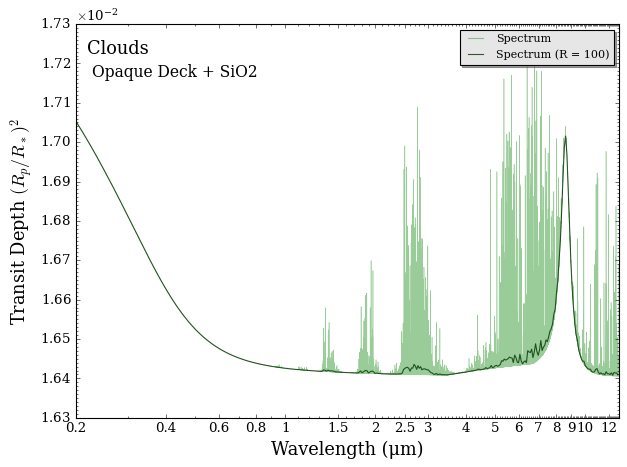

In [16]:
from POSEIDON.core import compute_spectrum
from POSEIDON.visuals import plot_spectra
from POSEIDON.utility import plot_collection

# Generate spectrum
spectrum = compute_spectrum(planet, star, model, atmosphere, opac, wl,
                                      spectrum_type = 'transmission')
# Plot spectrum
spectra = plot_collection(spectrum, wl, collection = [])

fig = plot_spectra(spectra, planet, R_to_bin = 100,
                   plt_label = 'Opaque Deck + SiO2',
                   save_fig = False) 